In [1]:
import matplotlib.pyplot as plt
import cv2
import imutils
import easyocr

(-0.5, 336.5, 215.5, -0.5)

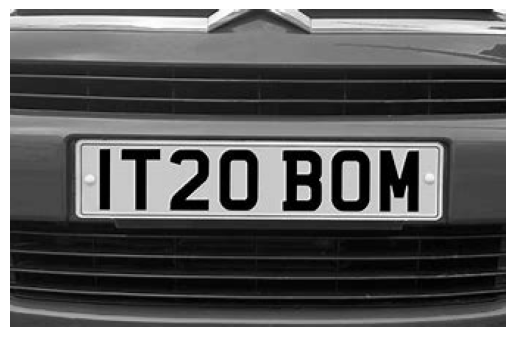

In [199]:
ima = cv2.imread("D:\\New folder\\np\\2.jpg")
gray = cv2.cvtColor(ima,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 336.5, 215.5, -0.5)

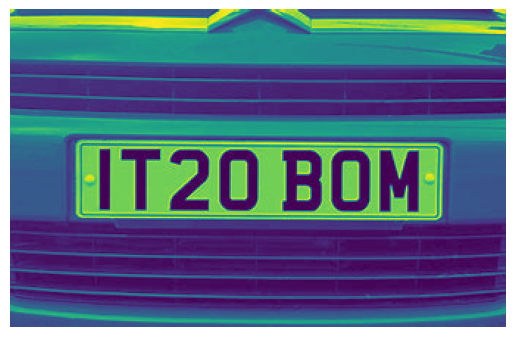

In [201]:
plt.imshow(gray)
plt.axis('off')

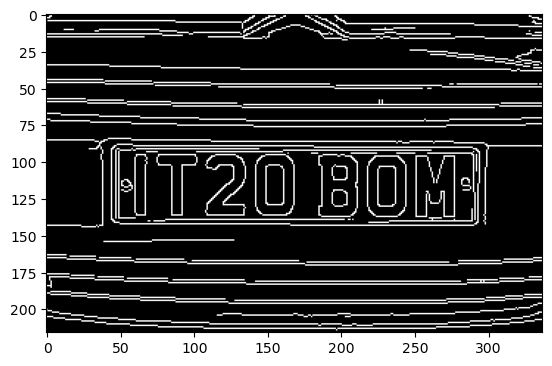

In [203]:
filter = cv2.bilateralFilter(gray,11,17,17)
edged = cv2.Canny(filter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

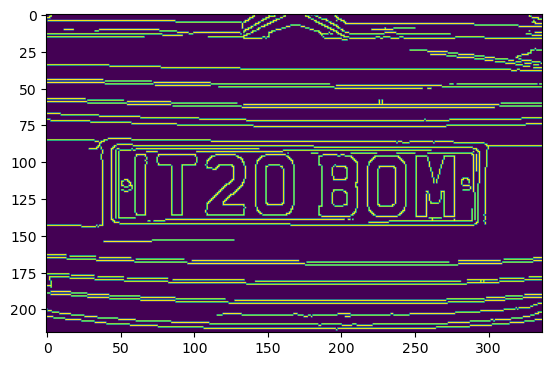

In [205]:
plt.imshow(edged)

In [207]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [209]:
loc = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        loc = approx
        break

In [211]:
loc

array([[[ 44,  91]],

       [[ 50, 142]],

       [[293, 141]],

       [[289,  90]]], dtype=int32)

In [213]:
import numpy as np
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[loc],0,255,-1)
new_image = cv2.bitwise_and(ima,ima,mask=mask)

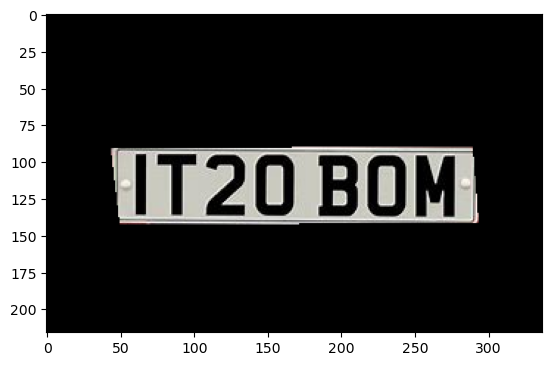

In [215]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [217]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_img = gray[x1:x2+1 , y1:y2+1]

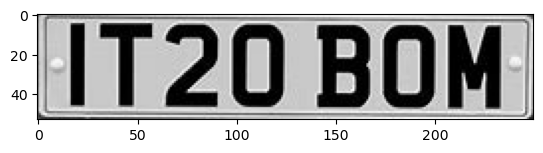

In [219]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

In [221]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_img)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[5, 0], [244, 0], [244, 53], [5, 53]], 'IT20 BOM', 0.6737997599413407)]

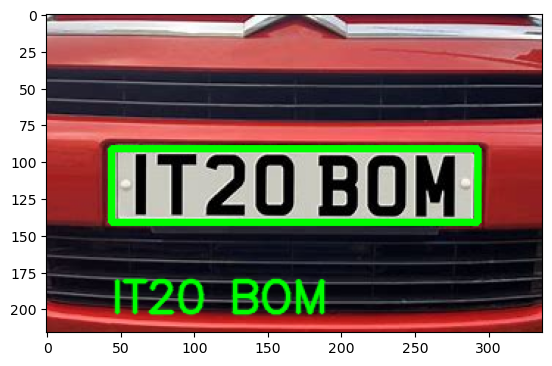

In [223]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(ima, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(ima, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [190]:
def detector (img_address):
    image = cv2.imread(img_address)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    filter = cv2.bilateralFilter(gray,11,17,17)
    edged = cv2.Canny(filter,30,200)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    loc = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour,10,True)
        if len(approx) == 4:
            loc = approx
            break
    mask1 = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask1,[loc],0,255,-1)
    new_image = cv2.bitwise_and(image,image,mask=mask1)
    (x,y) = np.where(mask==255)
    (x1,y1) = (np.min(x),np.min(y))
    (x2,y2) = (np.max(x),np.max(y))
    cropped_image = gray[x1:x2+1 , y1:y2+1]
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(image, text=text, 
                      org=(approx[0][0][0], 
                           approx[1][0][1]+60), 
                      fontFace=font, 
                      fontScale=1, 
                      color=(0,255,0), 
                      thickness=2, 
                      lineType=cv2.LINE_AA)
    res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    plt.axis('off')
    return plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    return result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


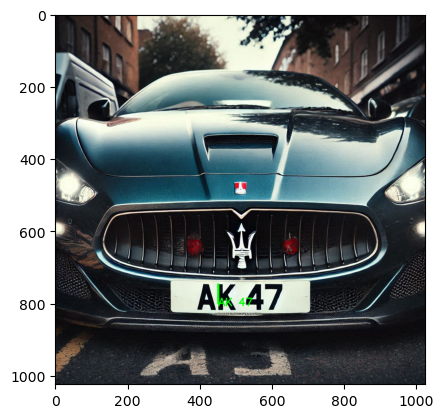

In [110]:
detector ("D:\\New folder\\ak47.png")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


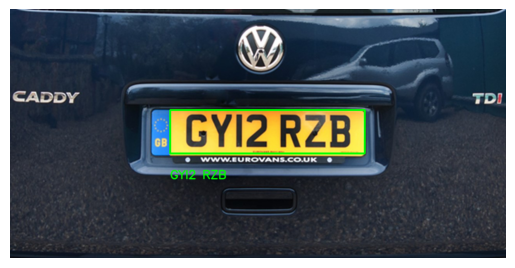

In [162]:
detector("D:\\New folder\\pp.jpg")